<a href="https://colab.research.google.com/github/YaraArbeed/Client-Support-Ticketing-System/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data  Preprocessing**

**LOADING DATA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import io
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split




In [3]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


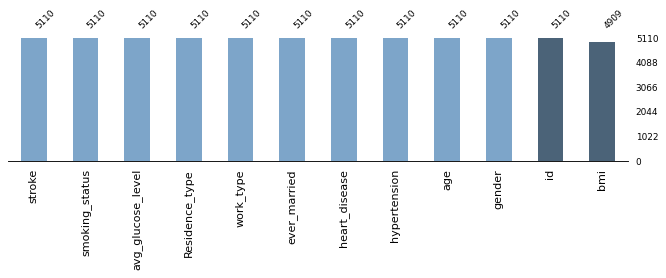

In [7]:

A= '#7DA5C9'
color = [A, A, A, A, A, A, A, A, A, A,'#4B6378','#4B6378']
fig, ax = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

**DROPPING COLUMN**

In [8]:
df.drop(columns=['id'],axis=1,inplace=True)
print(df.shape)

(5110, 11)


In [ ]:
df

**Handling Numerical Null Values**

Replace 201 null values in BMI with the mean

In [9]:
print(df['bmi'].isna().sum())


201


In [10]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
print(df['bmi'].isna().sum())

0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


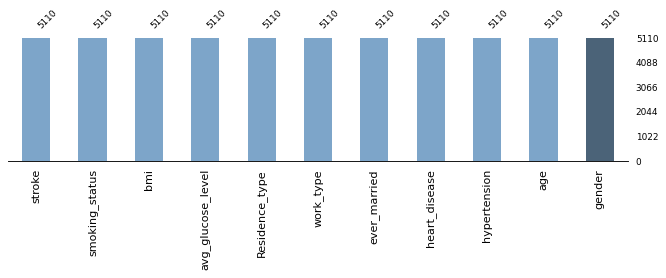

In [13]:
A= '#7DA5C9'
color = [A, A, A, A, A, A, A, A, A, A,'#4B6378','#4B6378']
fig, ax = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

**Handling Categorical Data**

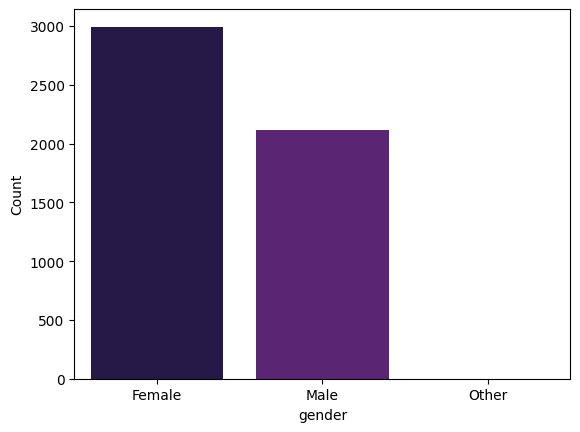

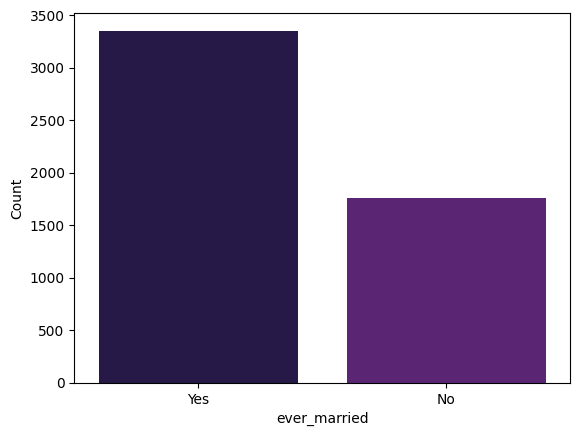

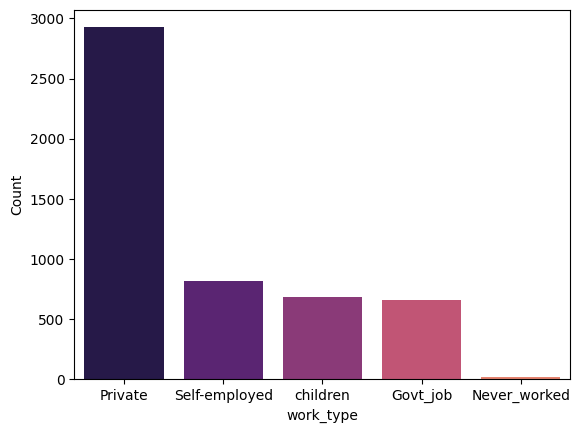

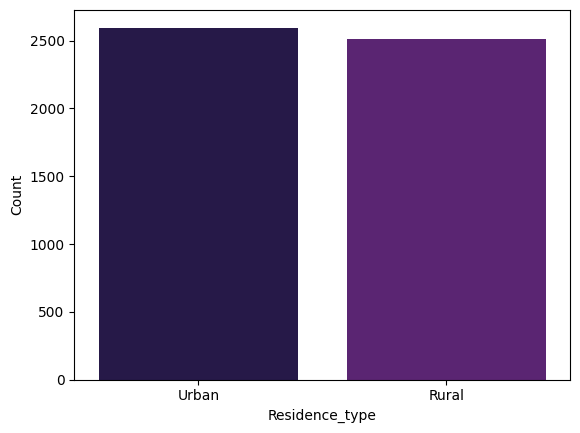

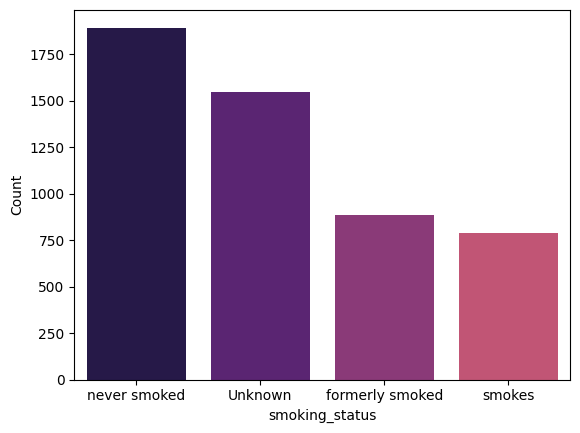

In [14]:

category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Handling Categorical Data**

Convert Gender,Residence_type,ever_marride to 0,1

In [15]:
df['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['ever_married'].dtype
df['gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
df = df[df['gender'].isin([0, 1])]  # Remove rows with 'Other' in the 'gender' column
df['gender'] = df['gender'].astype(int)
df['gender'].dtype
df['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace=True)
df['gender'].dtype
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 479.0+ KB


<ipython-input-15-0735e5db2371>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype(int)
<ipython-input-15-0735e5db2371>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace=True)


In [16]:
print(df['gender'].unique())


[1 0]


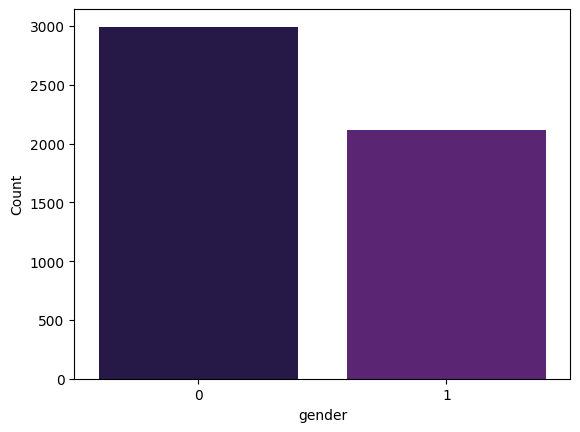

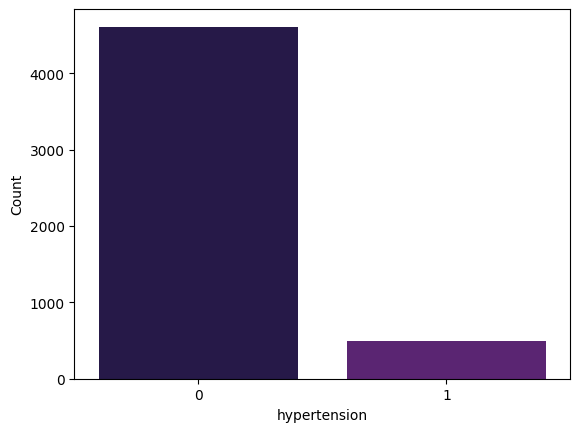

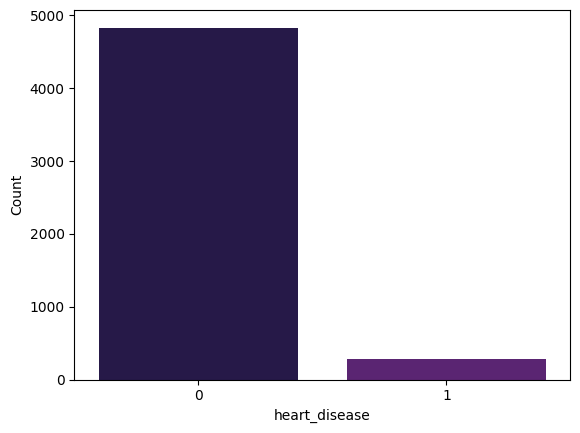

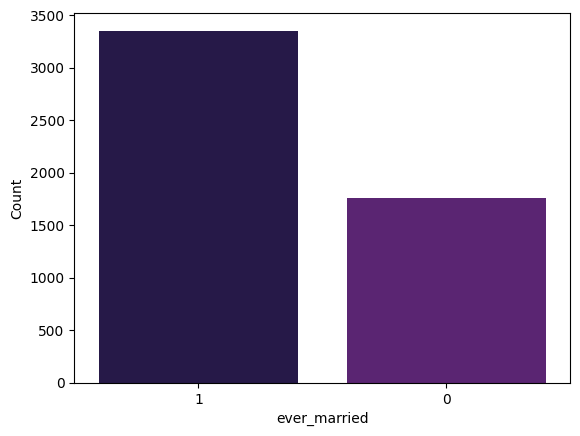

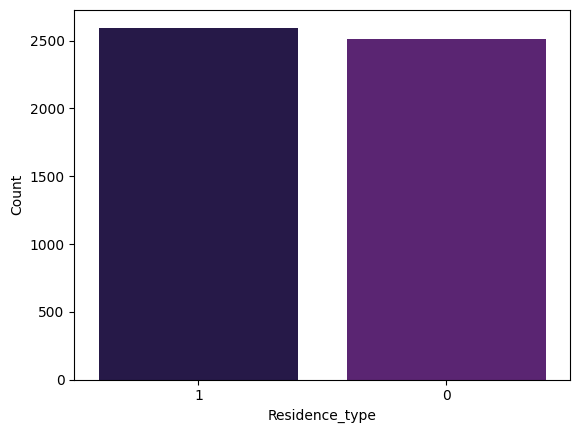

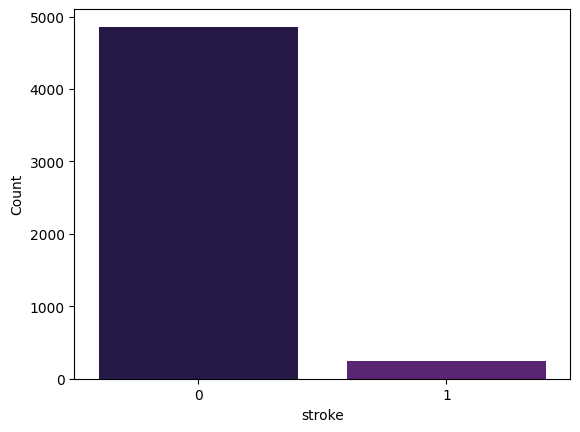

In [17]:
category_cols = df.select_dtypes(include=['int64'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [18]:
print(df['smoking_status'].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


use One Hot Encoding ,to convert Work Type and Smoking to more than one class

In [19]:
df= pd.get_dummies(df, columns = ['work_type', 'smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


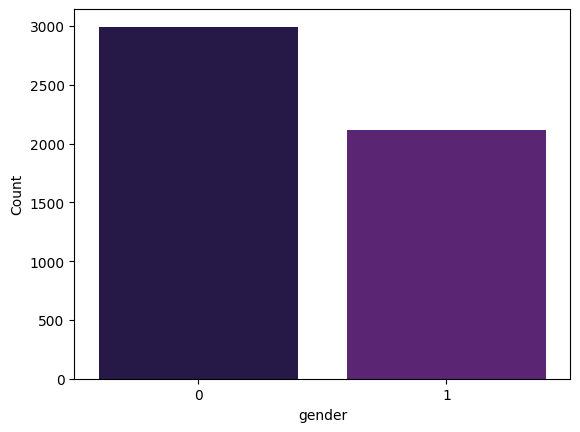

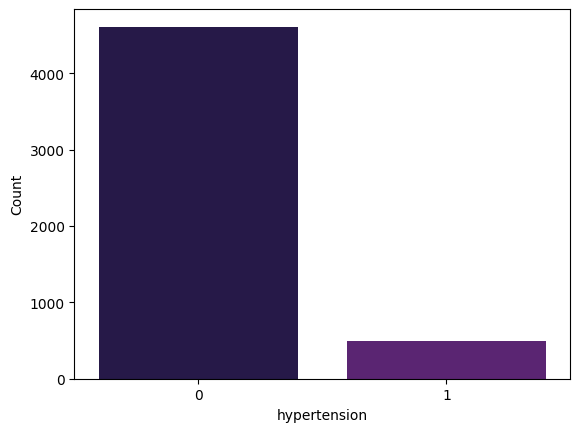

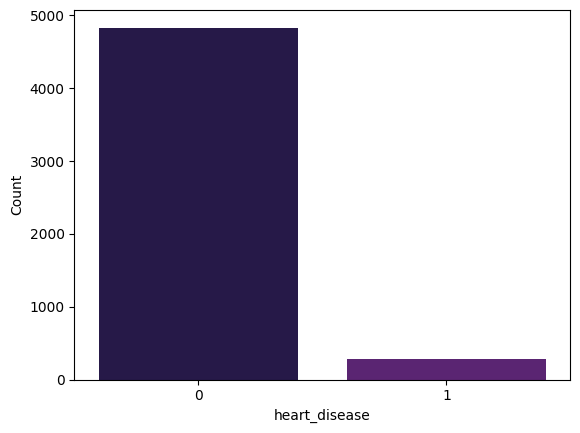

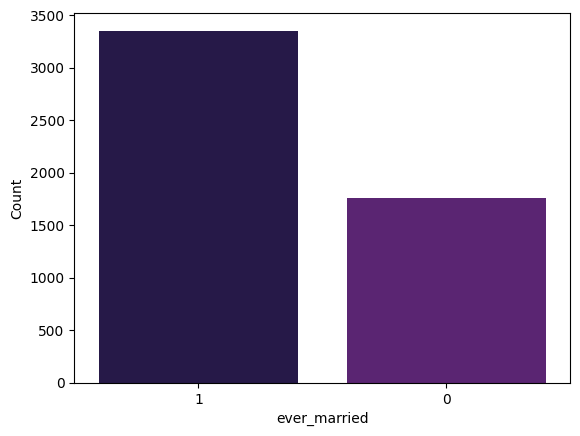

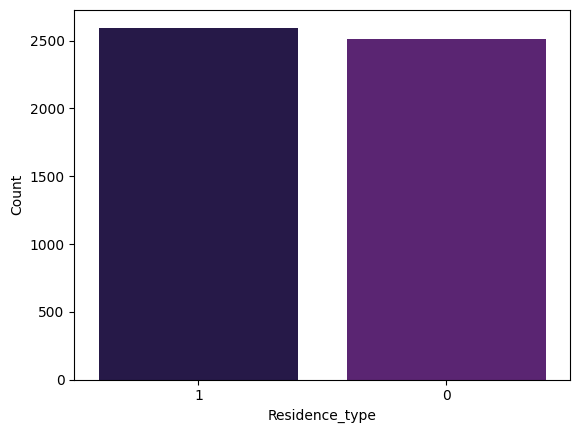

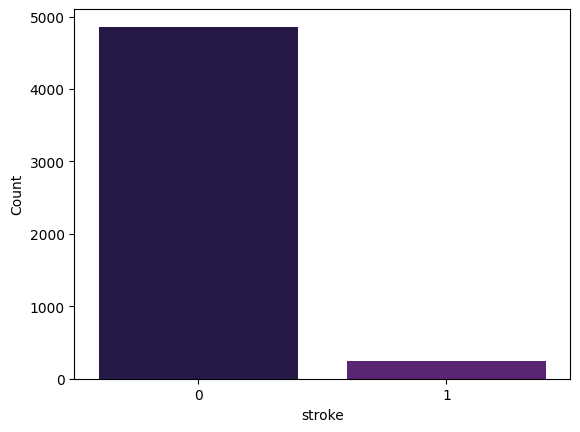

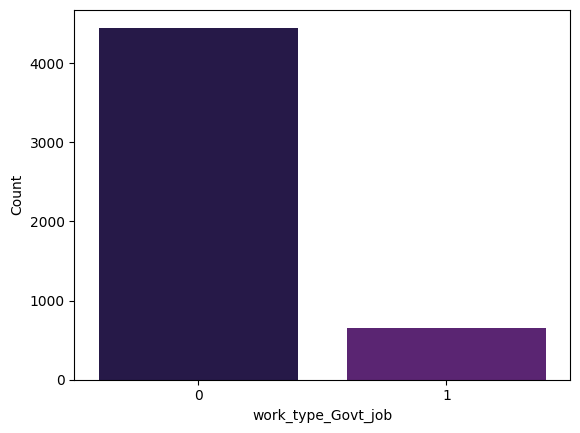

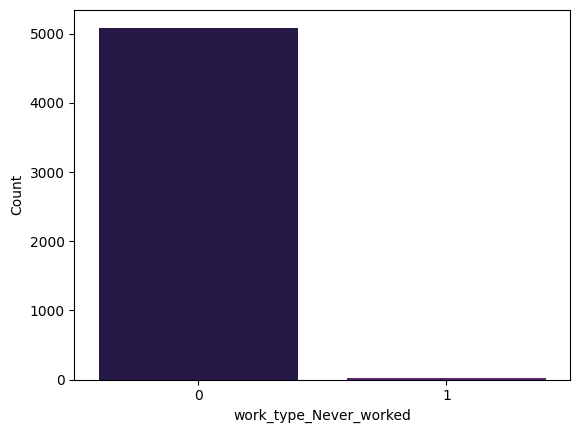

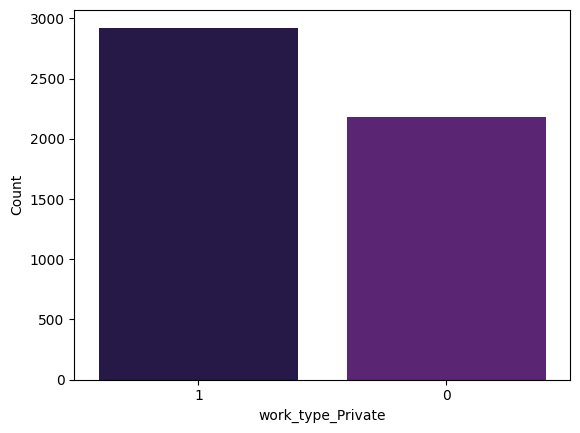

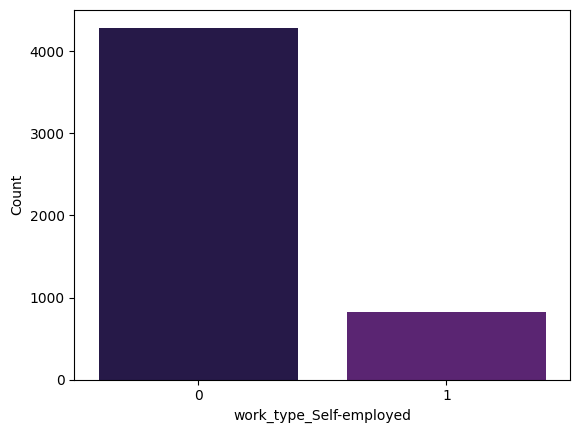

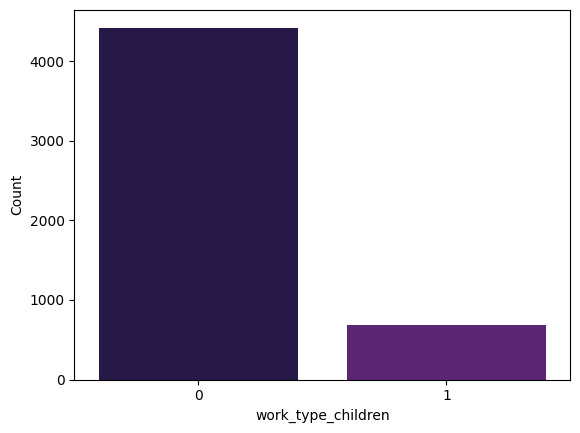

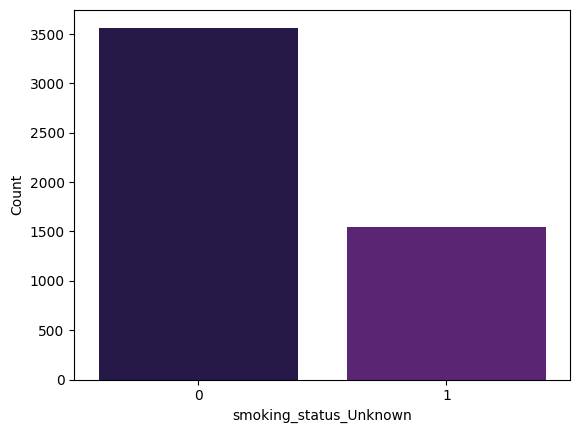

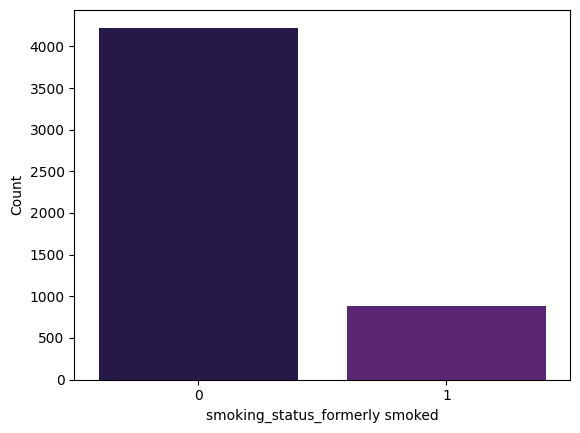

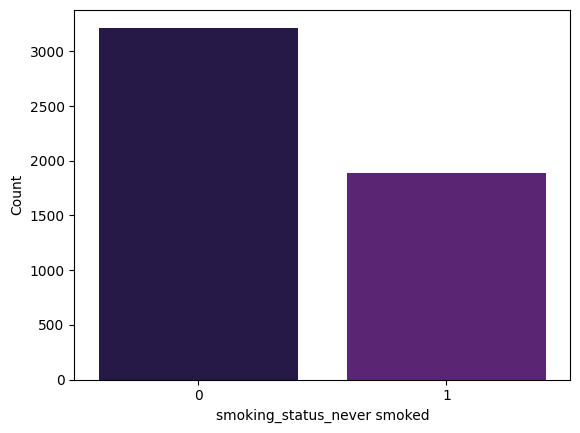

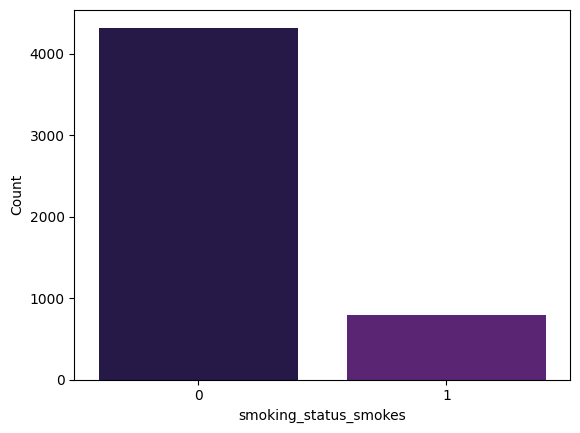

In [20]:
category_cols = df.select_dtypes(include=['int64'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

category_cols = df.select_dtypes(include=['uint8'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [21]:
print(df['work_type_Never_worked'].value_counts()) # This is what you will use


0    5087
1      22
Name: work_type_Never_worked, dtype: int64


Deleting unneccery features like work_type_Never_Worked ,since it has just 22 samples out of 5110

In [22]:
# Drop the rows where 'work_type_Never_worked' is 1
df = df[df['work_type_Never_worked'] != 1]

# Drop the 'work_type_Never_worked' feature column
df = df.drop('work_type_Never_worked', axis=1)

df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0


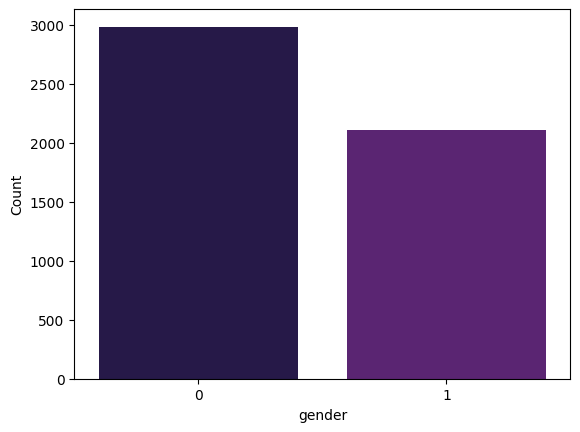

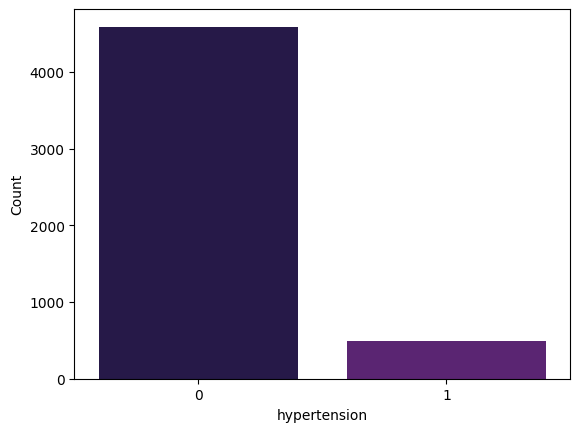

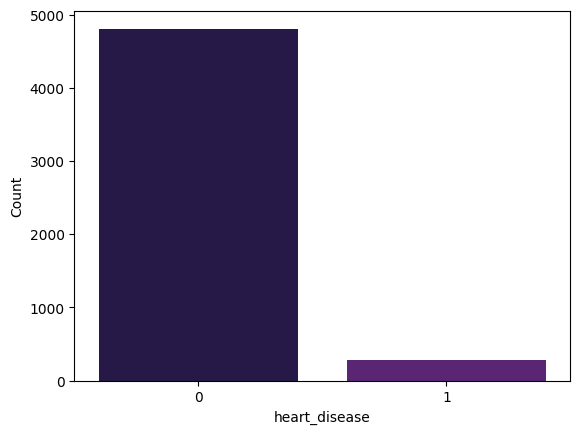

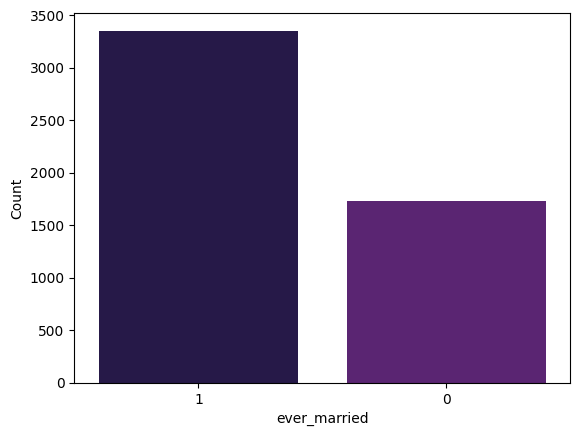

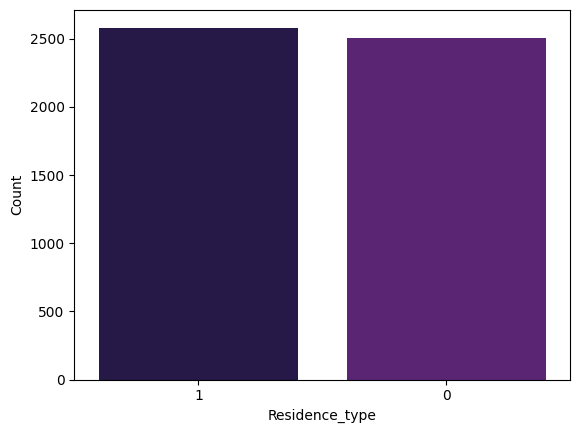

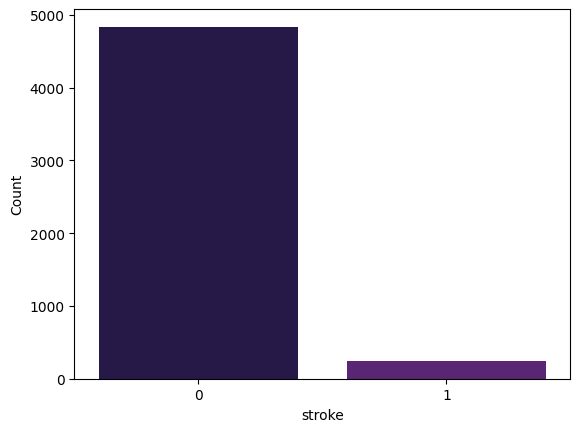

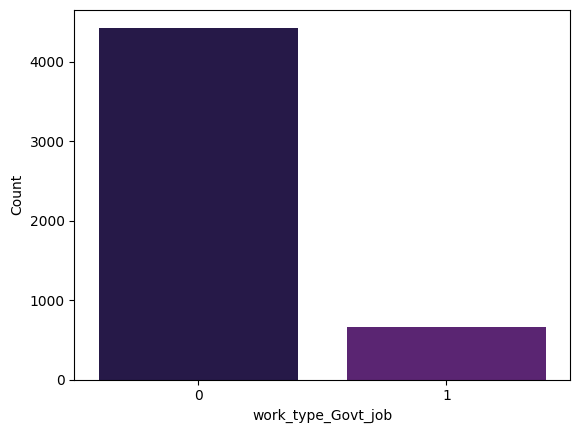

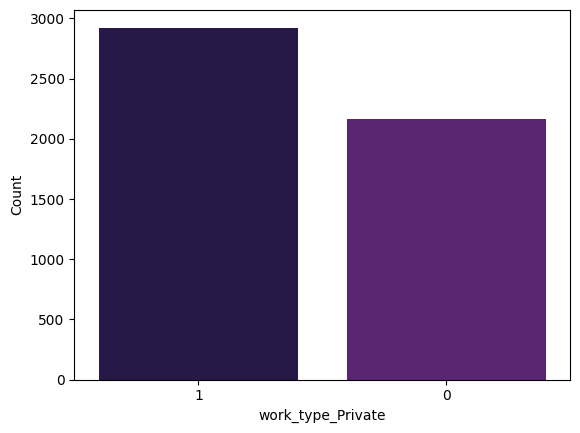

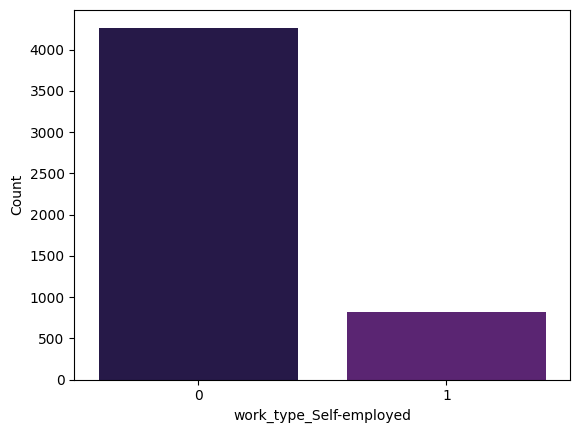

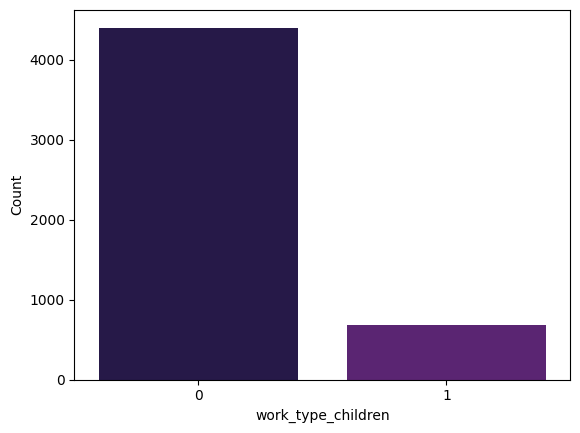

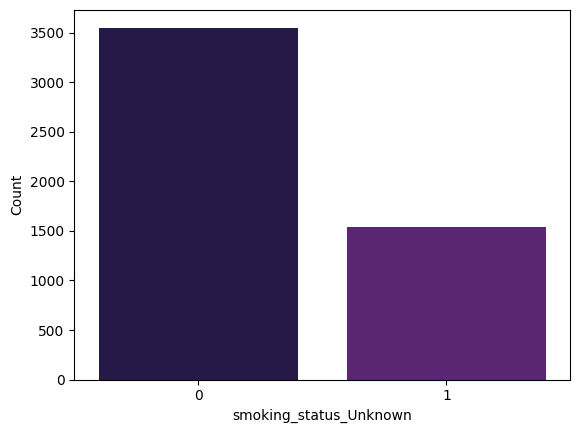

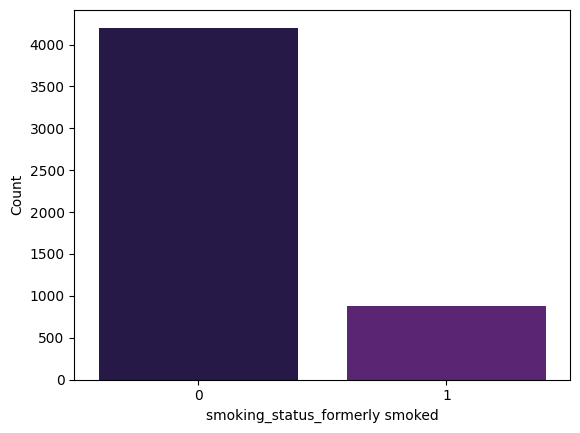

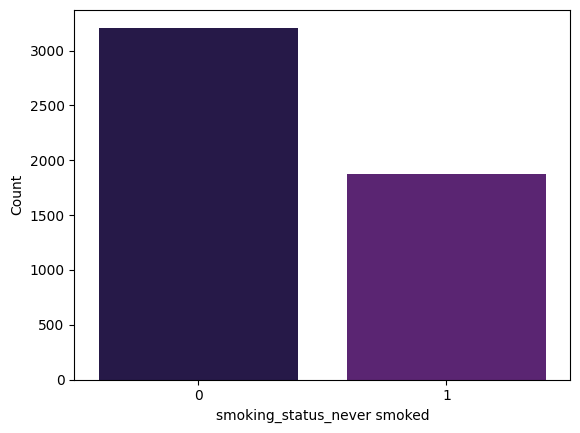

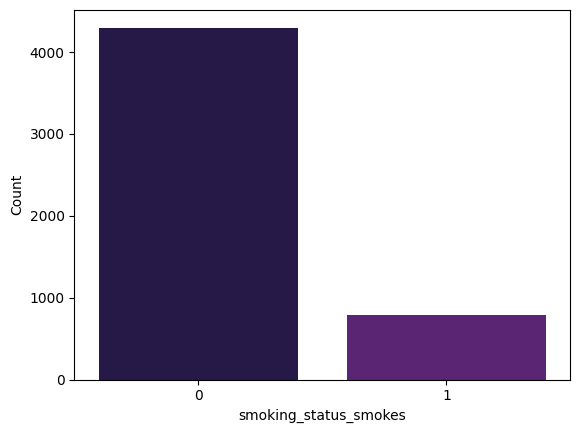

In [23]:
category_cols = df.select_dtypes(include=['int64'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

category_cols = df.select_dtypes(include=['uint8'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Scaling Features:Age,Avg-Glucose,BMI

In [24]:
continuous_columns = ['avg_glucose_level', 'bmi', 'age']

scaler = MinMaxScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])


In [25]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.301260,1,0,1,0,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,0.212981,1,0,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,0.254296,1,0,1,0,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,0.276060,1,0,1,0,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,0.156930,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,1,0.132167,0.212981,0,0,1,0,0,0,0,1,0
5106,0,0.987793,0,0,1,1,0.323516,0.340206,0,0,0,1,0,0,0,1,0
5107,0,0.426270,0,0,1,0,0.128658,0.232532,0,0,0,1,0,0,0,1,0
5108,1,0.621582,0,0,1,0,0.513203,0.175258,0,0,1,0,0,0,1,0,0


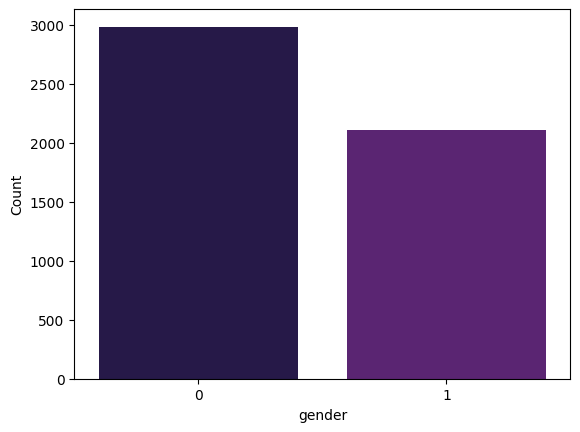

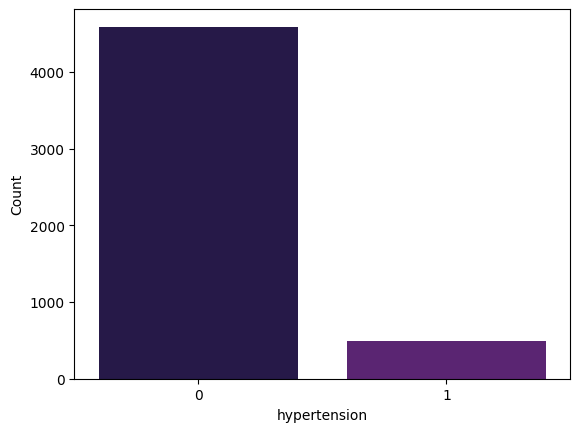

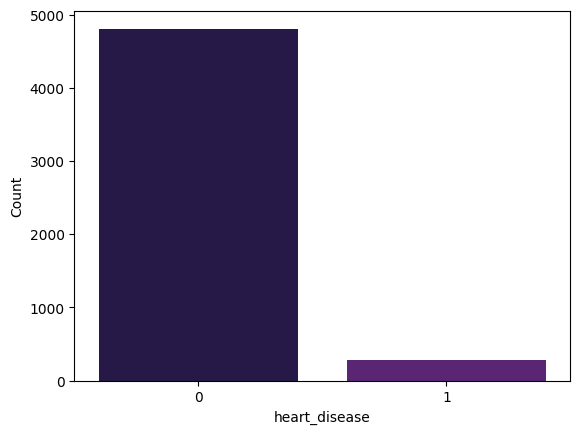

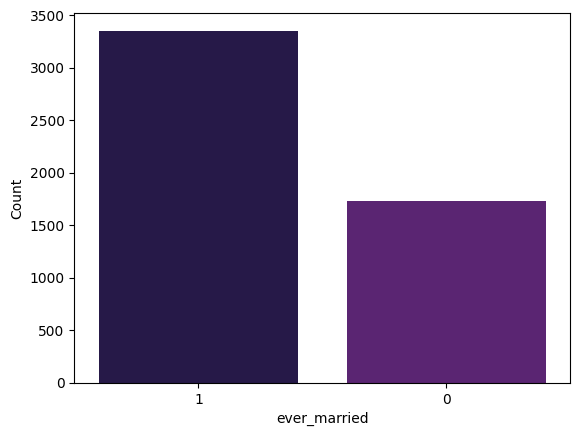

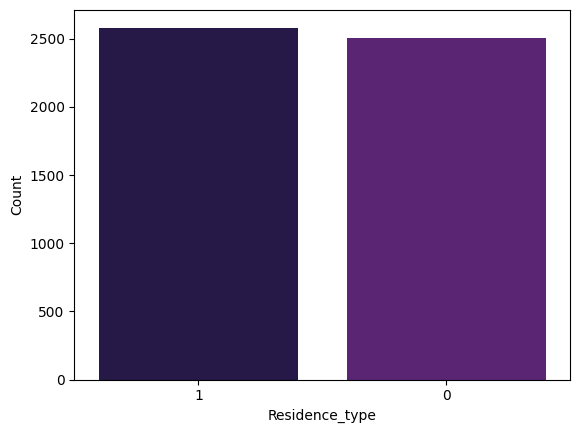

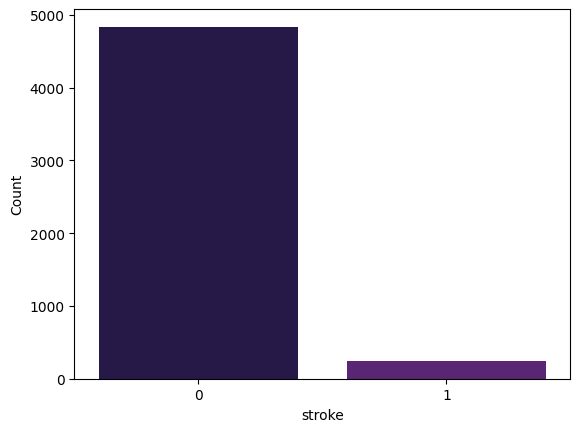

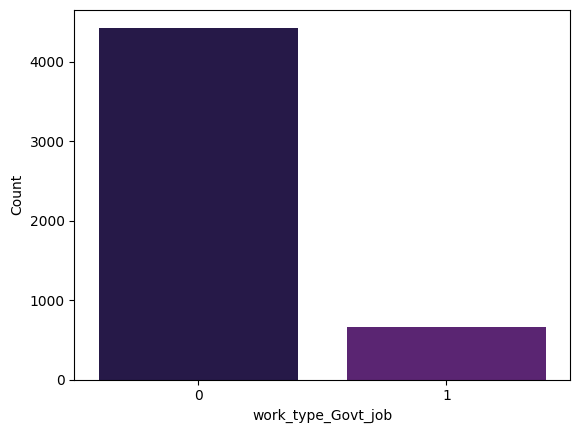

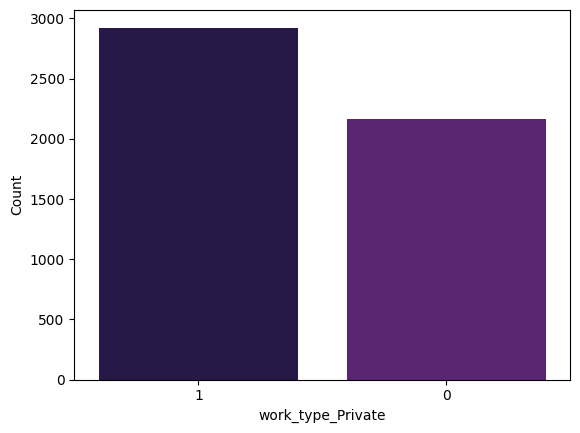

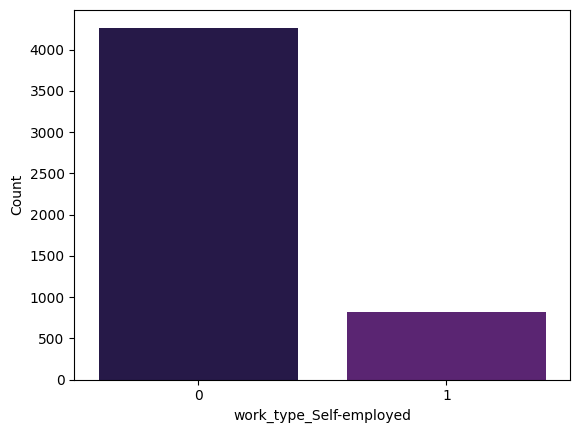

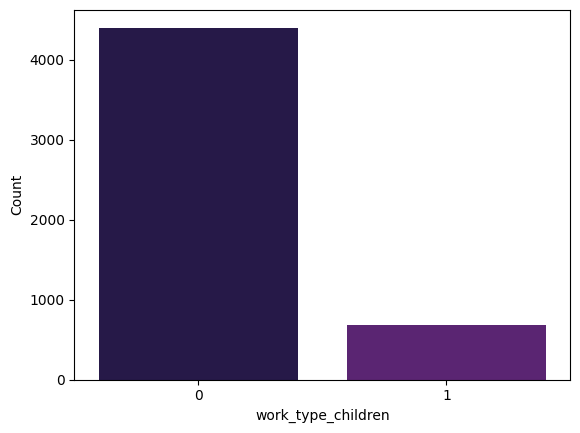

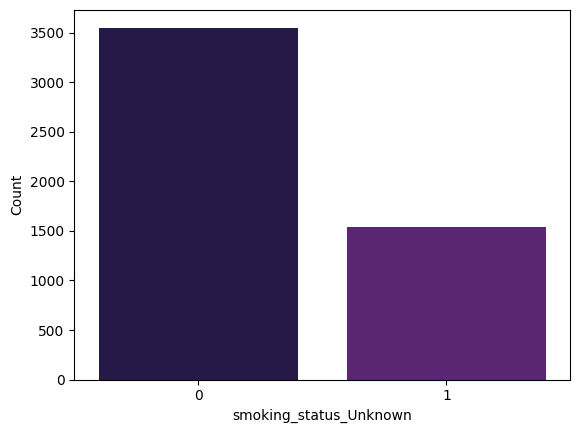

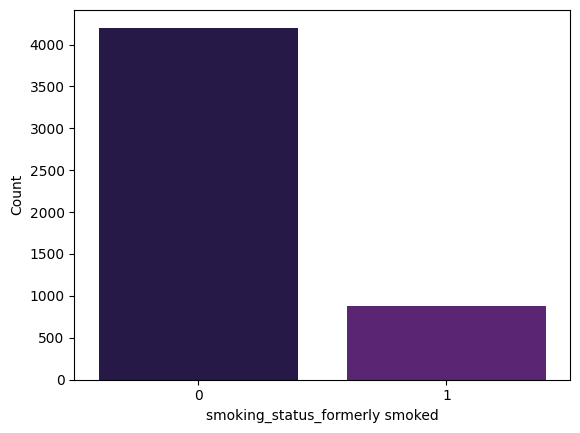

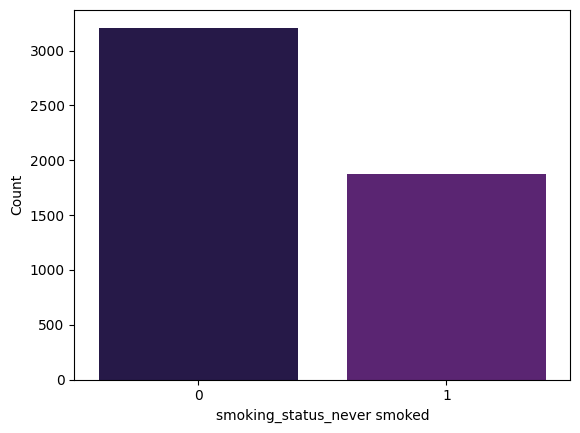

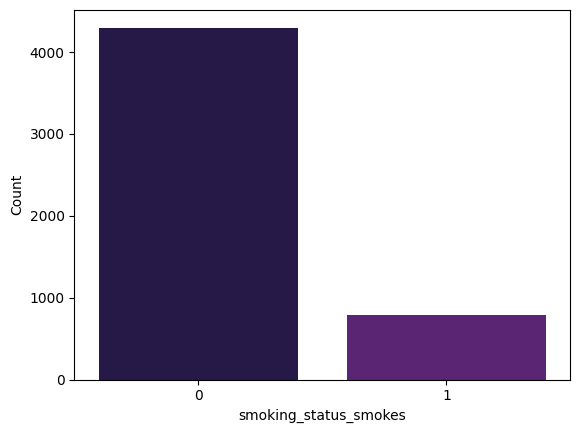

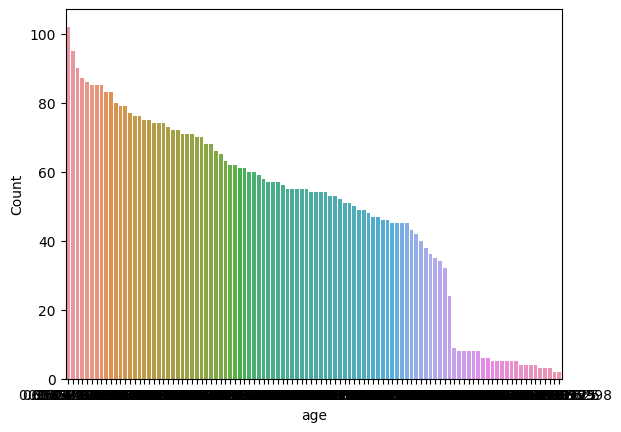

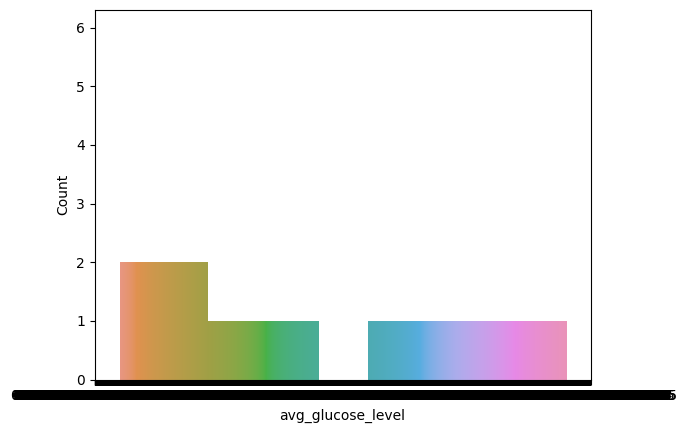

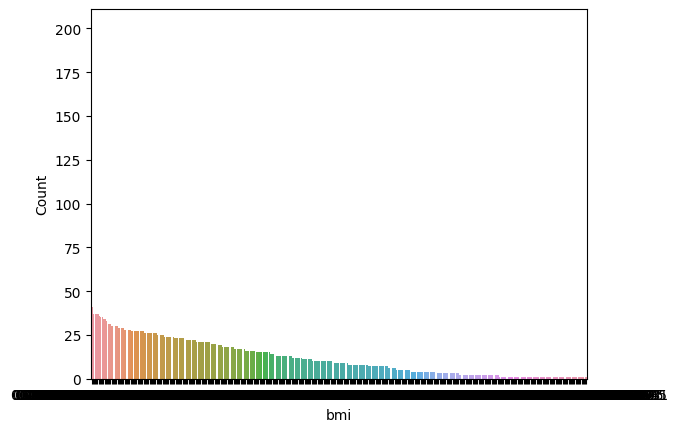

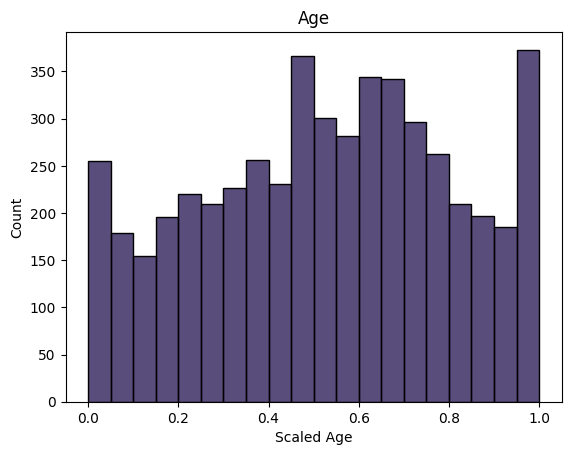

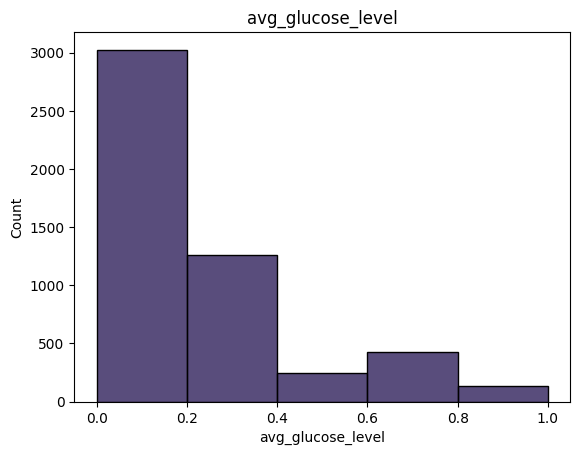

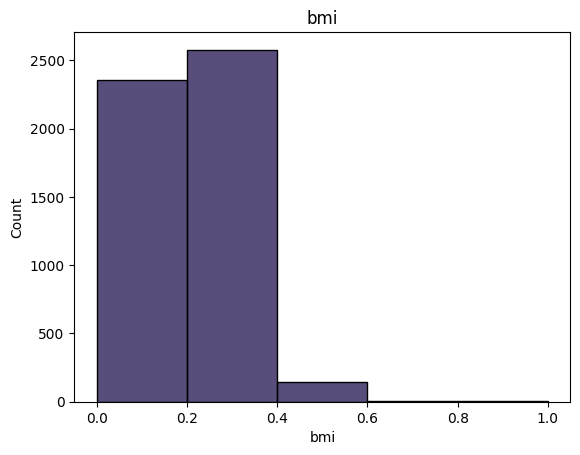

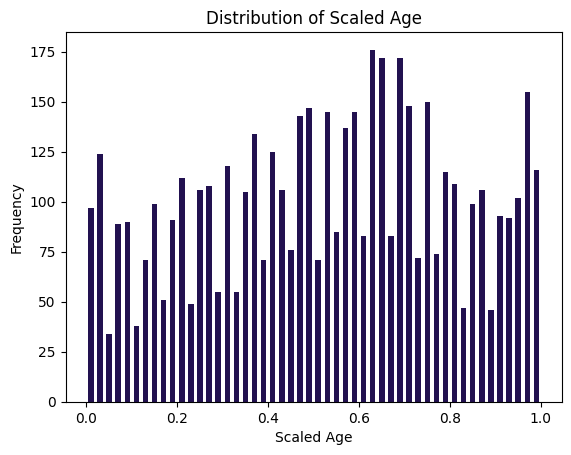

In [26]:
category_cols = df.select_dtypes(include=['int64'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

category_cols = df.select_dtypes(include=['uint8'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    category_cols = df.select_dtypes(include=['float64'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
sns.histplot(data=df, x='age',bins=20)
plt.xlabel('Scaled Age')
plt.ylabel('Count')
plt.title('Age')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()
sns.histplot(data=df, x='avg_glucose_level',bins=5)
plt.xlabel('avg_glucose_level')
plt.ylabel('Count')
plt.title('avg_glucose_level')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()
sns.histplot(data=df, x='bmi',bins=5)
plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('bmi')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()
plt.hist(df['age'], bins=50,rwidth=0.6)
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Age')
plt.show()





In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5087 non-null   int64  
 1   age                             5087 non-null   float64
 2   hypertension                    5087 non-null   int64  
 3   heart_disease                   5087 non-null   int64  
 4   ever_married                    5087 non-null   int64  
 5   Residence_type                  5087 non-null   int64  
 6   avg_glucose_level               5087 non-null   float64
 7   bmi                             5087 non-null   float64
 8   stroke                          5087 non-null   int64  
 9   work_type_Govt_job              5087 non-null   uint8  
 10  work_type_Private               5087 non-null   uint8  
 11  work_type_Self-employed         5087 non-null   uint8  
 12  work_type_children              50

**Confusion Matrix**

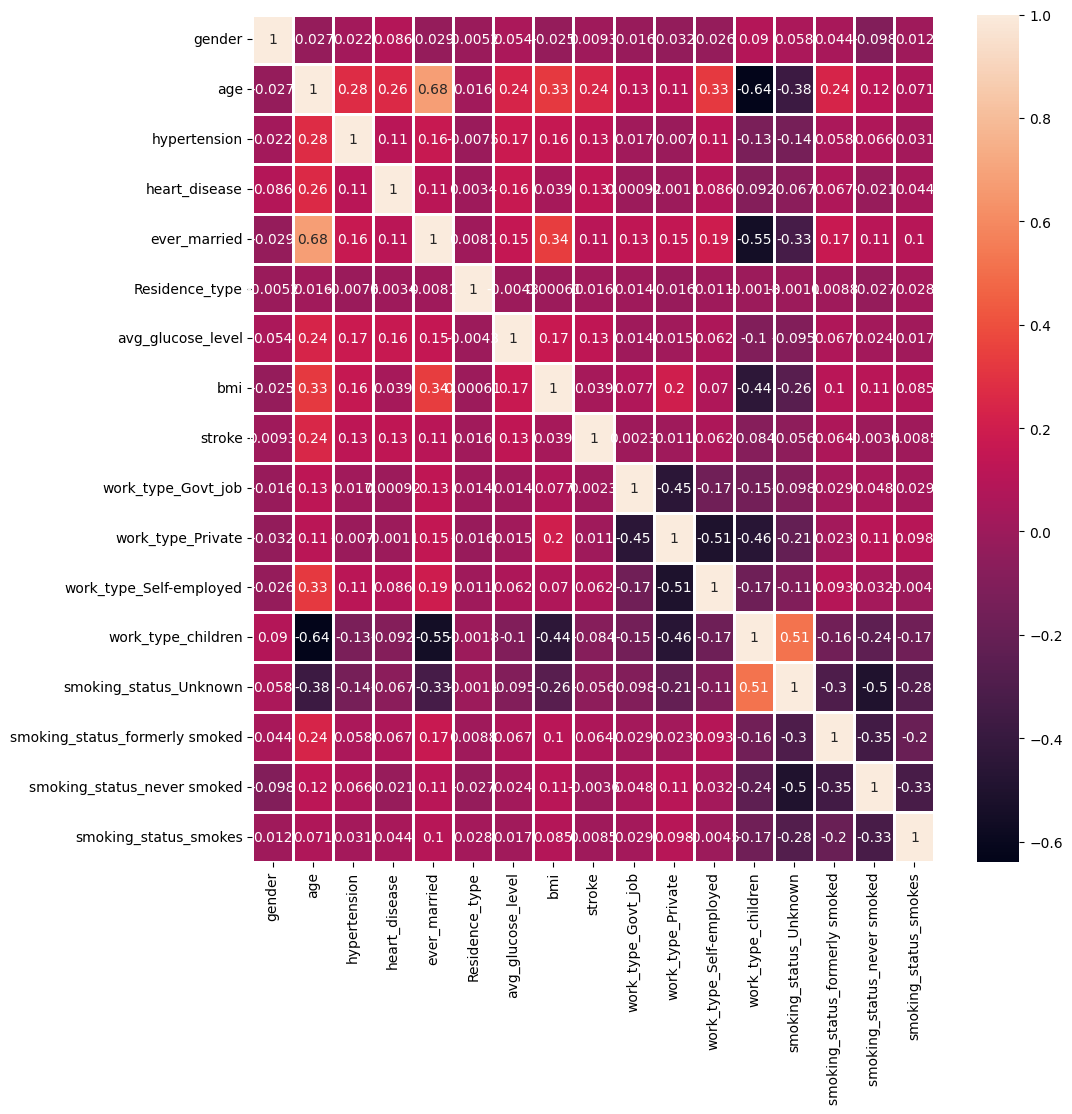

In [28]:
import seaborn as sns
correlation=df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(correlation, annot = True,linewidths=2,ax=ax)
plt.show()

Handling Unbalanced

In [29]:
print(df['stroke'].value_counts())


0    4838
1     249
Name: stroke, dtype: int64


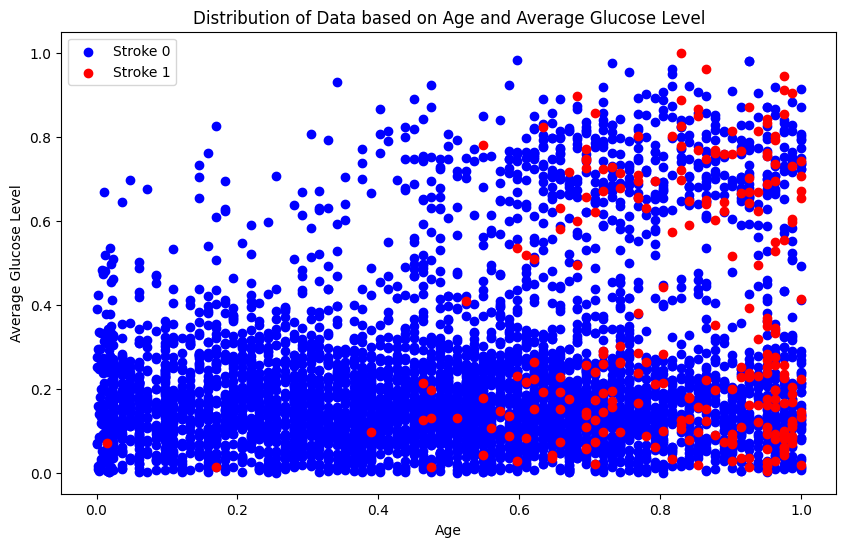

In [30]:

# Separate the data based on the stroke target attribute
stroke_0 = df[df['stroke'] == 0]
stroke_1 = df[df['stroke'] == 1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stroke_0['age'], stroke_0['avg_glucose_level'], color='blue', label='Stroke 0')
plt.scatter(stroke_1['age'], stroke_1['avg_glucose_level'], color='red', label='Stroke 1')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Distribution of Data based on Age and Average Glucose Level')
plt.legend()
plt.show()

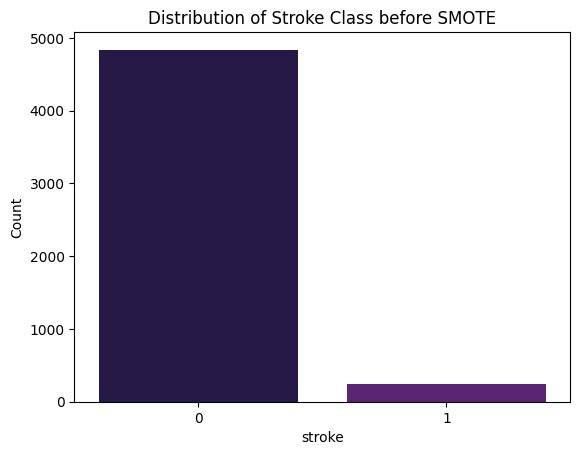

In [31]:
sns.set_palette('magma')

# Plot count plot for 'stroke' attribute
sns.countplot(data=df, x='stroke')
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Class before SMOTE')
plt.show()

In [32]:
X = df.drop(columns=['stroke'])
y = df['stroke']
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5087 non-null   int64  
 1   age                             5087 non-null   float64
 2   hypertension                    5087 non-null   int64  
 3   heart_disease                   5087 non-null   int64  
 4   ever_married                    5087 non-null   int64  
 5   Residence_type                  5087 non-null   int64  
 6   avg_glucose_level               5087 non-null   float64
 7   bmi                             5087 non-null   float64
 8   stroke                          5087 non-null   int64  
 9   work_type_Govt_job              5087 non-null   uint8  
 10  work_type_Private               5087 non-null   uint8  
 11  work_type_Self-employed         5087 non-null   uint8  
 12  work_type_children              50

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.301260,1,0,1,0,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,0.212981,1,0,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,0.254296,1,0,1,0,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,0.276060,1,0,1,0,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,0.156930,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,1,0.132167,0.212981,0,0,1,0,0,0,0,1,0
5106,0,0.987793,0,0,1,1,0.323516,0.340206,0,0,0,1,0,0,0,1,0
5107,0,0.426270,0,0,1,0,0.128658,0.232532,0,0,0,1,0,0,0,1,0
5108,1,0.621582,0,0,1,0,0.513203,0.175258,0,0,1,0,0,0,1,0,0


In [33]:
# Create an instance of SMOTE
smote = SMOTE()
# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

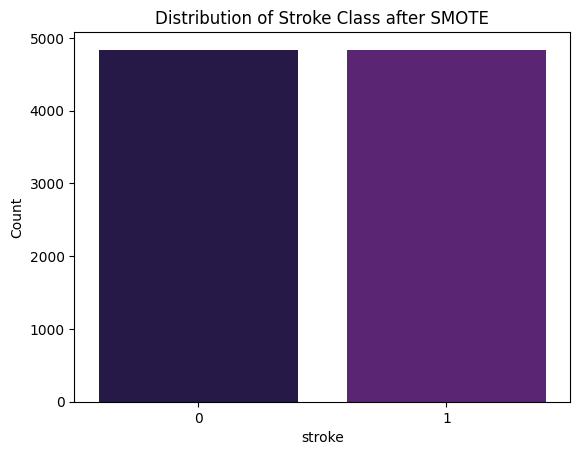

In [34]:
sns.set_palette('magma')

# Plot count plot for 'stroke' attribute
sns.countplot(data=df, x=y_resampled)
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Class after SMOTE')
plt.show()

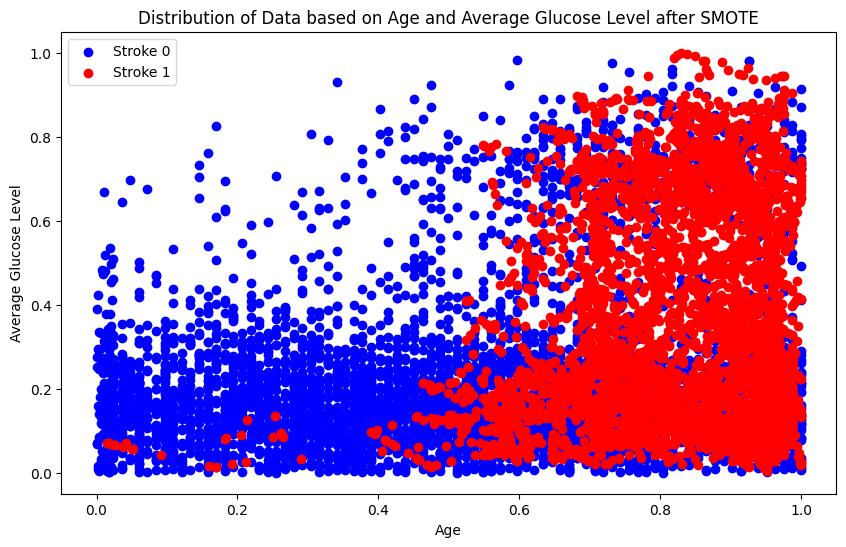

In [35]:

# Separate the data based on the stroke target attribute
stroke_0 = X_resampled[y_resampled == 0]
stroke_1 = X_resampled[y_resampled == 1]


# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stroke_0['age'], stroke_0['avg_glucose_level'], color='blue', label='Stroke 0')
plt.scatter(stroke_1['age'], stroke_1['avg_glucose_level'], color='red', label='Stroke 1')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Distribution of Data based on Age and Average Glucose Level after SMOTE')
plt.legend()
plt.show()

**Handling Categorical null values**



